# Data Visualizations: 
## *Alphabetical Guide to the Wines of Washington* (*Wine Spectator*, Sep 2020)

## Geographic Visualizations

### File Setup

In [2]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

# import os, shutil for file navigation
import os
import shutil
import glob

# import other packages
import geopandas as gpd

In [3]:
# initialize visualization set
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

# Jupyter Notebook
%matplotlib inline

### Concatenate Shapefiles

In [5]:
# Create an array listing file names for each AVA.
ava_arr = os.listdir('./AVA')
print(ava_arr)

['wahluke_slope', 'royal_slope', 'lake_chelan', 'walla_walla_valley', 'lewis-clark_valley', 'columbia_gorge', 'horse_heaven_hills', 'puget_sound', 'candy_mountain', 'red_mountain', 'yakima_valley', 'ancient_lakes_of_columbia_valley', 'rattlesnake_hills', 'snipes_mountain', 'columbia_valley', 'naches_heights']


In [6]:
# Copy shapefiles into a single directory


# Create a single directory
if not os.path.exists('./ava_shapefiles'):
    os.makedirs('./ava_shapefiles')
if not os.path.exists('./ava_all'):
    os.makedirs('./ava_all')

# Copy files into directory
for ava in ava_arr:
    if not os.path.exists('./ava_shapefiles/' + ava + '.shp'):
        original = './AVA/' + ava + '/' + ava + '.shp'
        target = './ava_shapefiles/' + ava + '.shp'
        shutil.copyfile(original, target)
    if not os.path.exists('./ava_shapefiles/' + ava + '.shx'):
        original = './AVA/' + ava + '/' + ava + '.shx'
        target = './ava_shapefiles/' + ava + '.shx'
        shutil.copyfile(original, target)
    if not os.path.exists('./ava_shapefiles/' + ava + '.prj'):
        original = './AVA/' + ava + '/' + ava + '.prj'
        target = './ava_shapefiles/' + ava + '.prj'
        shutil.copyfile(original, target)
    if not os.path.exists('./ava_shapefiles/' + ava + '.dbf'):
        original = './AVA/' + ava + '/' + ava + '.dbf'
        target = './ava_shapefiles/' + ava + '.dbf'
        shutil.copyfile(original, target)

In [7]:
# concatenate files
if not os.path.exists('./ava_all/ava_shapefiles.shp'):
    path = './ava_shapefiles/'
    files = glob.glob(path + '*.shp')

    gdf = pd.concat([gpd.read_file(shp) for shp in files], sort=False).pipe(gpd.GeoDataFrame)

    gdf.to_file('./ava_all/ava_shapefiles.shp')

### Open Vector Maps

In [8]:
shp_path = './ava_all/ava_shapefiles.shp'
sf = shp.Reader(shp_path)

In [9]:
# Number of records (shapes) in concatenated shape file. Here, numbers of AVA polygons.
len(sf.shapes())

16

In [10]:
# Explore one shapefile record.
sf.records()[1]

Record #1: [255, 'Royal Slope', 0, 0.0, 'Washington', '', '2', 'None', 'Columbia Valley', 1599004800000, 'Established', '27 CFR 9.271', 'None', '', 'Adams, Grant', 0.074763210199762, 1.97896346427747, 'F']

### Convert shapefiles into a Pandas dataframe

In [12]:
# Convert the shapefile into a Pandas dataframe
def read_shapefile(sf):
    # read a shapefile into a Pandas dataframe with a 'coords' column holding the geometry information.
    # this uses the pyshp package.
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    
    return df

In [13]:
# Present shapefile as dataframe.

df = read_shapefile(sf)
df

,OBJECTID,Name,Id,Area,States,Phase,Level_,Contains_,Within,Establishe,Status,CFR_Sectio,Partially_,Note,Counties,Shape_Area,Shape_Leng,selected,coords
0,216,Columbia Gorge,0,621.896085,"Oregon, Washington",Phase XIV,1,None,None,1084147200000,Established,27 CFR 9.178,None,,"OR: Hood River, Wasco; WA: Klickitat, Skamania",0.090822,1.933248,F,"[(-121.627176804498, 45.7056269235344), (-121...."
1,255,Royal Slope,0,0.000000,Washington,,2,None,Columbia Valley,1599004800000,Established,27 CFR 9.271,None,,"Adams, Grant",0.074763,1.978963,F,"[(-119.980283566903, 46.9857319279403), (-119...."
2,67,Walla Walla Valley,0,1035.582049,"Oregon, Washington",Phase VI,2,The Rocks District of Milton-Freewater,Columbia Valley,444873600000,Established,27 CFR 9.91,None,,OR: Umatilla; WA: Walla Walla,0.150226,4.155462,F,"[(-118.752240225833, 46.0650273989079), (-118...."
3,226,Ancient Lakes of Columbia Valley,0,570.568421,Washington,Phase XIX,2,None,Columbia Valley,1350518400000,Established,27 CFR 9.227,None,,"Douglas, Grant, Kittitas",0.081130,1.382728,F,"[(-120.095377980367, 47.2456320777975), (-120...."
4,227,Lake Chelan,0,111.898347,Washington,Phase XVIII,2,None,Columbia Valley,1232496000000,Established,27 CFR 9.215,None,,Chelan,0.015688,0.885637,F,"[(-119.9743709105, 47.8474480947289), (-119.97..."
5,162,Lewis-Clark Valley,0,1008.773304,"Idaho, Washington",Phase XXI,1,None,None,1461110400000,Established,27 CFR 9.256,None,,"ID: Clearwater, Latah; WA: Asotin, Garfield, W...",0.145407,16.491167,F,"[(-117.229203855546, 46.4239508801636), (-117...."
6,144,Red Mountain,0,14.916350,Washington,Phase XIII,3,None,"Columbia Valley, Yakima Valley",986860800000,Established,27 CFR 9.167,None,,Benton,0.002154,0.244601,F,"[(-119.438392430228, 46.2619092390181), (-119...."
7,220,Horse Heaven Hills,0,1860.765196,Washington,Phase XV,2,None,Columbia Valley,1120176000000,Established,27 CFR 9.188,None,,"Benton, Klickitat, Yakima",0.270045,4.658133,F,"[(-119.706752055188, 46.2047744716618), (-119...."
8,66,Columbia Valley,0,38088.772849,"Oregon, Washington",Phase V,1,"Ancient Lakes of Columbia Valley, Candy Mounta...",None,469152000000,Established,27 CFR 9.74,None,,"OR: Gilliman, Morrow, Sherman, Umatilla, Wasc...",5.477803,38.302919,F,"[(-117.229203855546, 46.4239508801636), (-117...."
9,219,Rattlesnake Hills,0,245.157935,Washington,Phase XVI,3,None,"Columbia Valley, Yakima Valley",1140220800000,Established,27 CFR 9.193,None,,Yakima,0.035303,1.207129,F,"[(-120.465387337277, 46.520589754441), (-120.4..."


### Plot a specific shape

In [14]:
# Plot a single shape (here, AVA)

def plot_shape(id, s=None):
    # get the shape file for the named AVA
    shape_ex = sf.shape(id)
    print(shape_ex)
    
    # plot area
    plt.figure()
    
    # set axes
    ax = plt.axes()
    ax.set_aspect('equal')

    # initialize an array of rows and columns with 0 in place of each element
    # array: number of rows = len(shape_ex, point), number of columns = 1
    x_lon = np.zeros((len(shape_ex.points), 1))
    y_lat = np.zeros((len(shape_ex.points), 1))
    
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
        
    # plot using stored coordinates stored in numpy array
    plt.plot(x_lon, y_lat)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0], shape_ex.bbox[2])
    return x0, y0

(-118.31754348108943, 45.951246723169305)

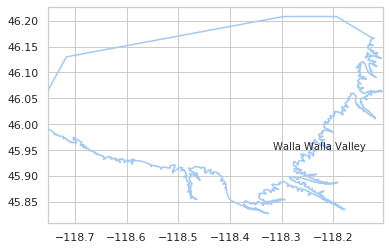

In [15]:
ava = 'Walla Walla Valley'
ava_id = df[df.Name == ava].index.get_values()[0]
plot_shape(ava_id, ava)

### Plot all shapes on the same graph (i.e., all AVAs on the same map)

In [16]:
def plot_map_all(sf, xlim = None, ylim = None, figsize=(14, 14)):
    # Plot map with lim coordinates
    plt.figure(figsize = figsize)
    id = 0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (xlim == None) & (ylim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id + 1
    
    if (xlim != None) & (ylim != None):
        plt.xlim(x_lim)
        plt.ylim(y_lim)

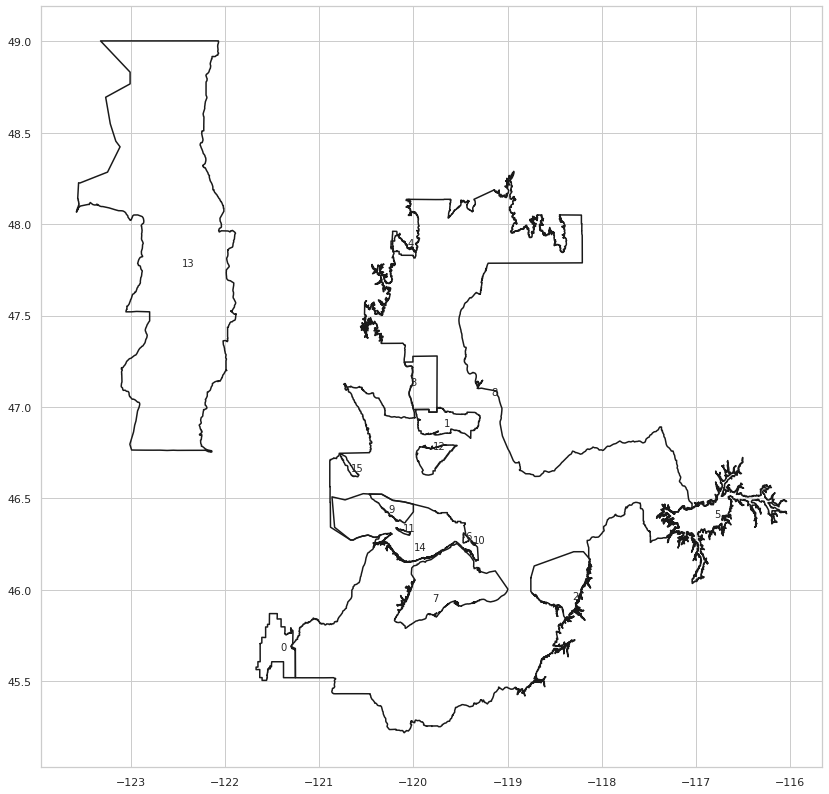

In [17]:
plot_map_all(sf)

### Create Heat Maps

In [18]:
# Create a function to separate the source data into bins. Color code those bins.

def calc_color(data, color=None):
    if color   == 1: color_sq = ['#ffccff', '#e0a3e0', '#c27ac2', '#a352a3', '#852985', '#660066']; colors = 'Purples';
    elif color == 2: color_sq = ['#ffcccc', '#ebada3', '#d68f7a', '#c27052', '#ad5229', '#993300']; colors = 'Reds';
    elif color == 3: color_sq = ['#ffff00', '#ebd600', '#d6ad00', '#c28500', '#ad5c00', '#993300']; colors = 'YlOrRd';
    elif color == 4: color_sq = ['#99ccff', '#7aa3e0', '#5c7ac2', '#3d52a3', '#1f2985', '#000066']; colors = 'Blues';
    elif color == 5: color_sq = ['#993333', '#8f293d', '#851f47', '#7a1452', '#700a5c', '#660066']; colors = 'RdPu';
    elif color == 9: color_sq = ['#99ccff', '#7aa3e0', '#5c7ac2', '#3d52a3', '#1f2985', '#000066']; colors = 'Blues';
    else:            color_sq = ['#993333', '#8f293d', '#851f47', '#7a1452', '#700a5c', '#660066']; colors = 'RdPu';
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val])
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
        for i in range(6):
            print('\n' + str(i+1) + ': ' + str(int(bins[i])) + ' => ' + str(int(bins[i+1]) -1), end = ' ')
        print('\n\n   1   2   3   4   5   6')
    return color_ton, bins;

In [19]:
# Plot map with specific AVAs, using specific color

def plot_ava_data(sf, title, avas, data=None, color=None, print_id=False):
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    ava_id = []
    for i in avas:
        ava_id.append(df[df.Name == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, ava_id, print_id, 
                                     color_ton, bins, 
                                     x_lim=None, y_lim=None, figsize=(14, 14));

In [20]:
# Plot map with lim coordinates

def plot_map_fill_multiples_ids_tone(sf, title, ava, print_id,
                                    color_ton, bins,
                                    x_lim=None, y_lim=None, figsize=(14, 14)):
    
    # plot area and set axes
    plt.figure(figsize = figsize)
    
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')

        for id in ava:
            shape_ex = sf.shape(id)
            
            # initialize an array of rows and columns with 0 in place of each element
            # array: number of rows = len(shape_ex, point), number of columns = 1
            x_lon = np.zeros((len(shape_ex.points), 1))
            y_lat = np.zeros((len(shape_ex.points), 1))
            for ip in range(len(shape_ex.points)):
                x_lon[ip] = shape_ex.points[ip][0]
                y_lat[ip] = shape_ex.points[ip][1]
            ax.fill(x_lon, y_lat, color_ton[ava.index(id)])
            if print_id != False:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
                plt.text(x0, y0, id, fontsize=10)

        if (x_lim != None) & (y_lim != None):
            plt.xlim(x_lim)
            plt.ylim(y_lim)

['Columbia Gorge' 'Royal Slope' 'Walla Walla Valley'
 'Ancient Lakes of Columbia Valley' 'Lake Chelan' 'Lewis-Clark Valley'
 'Red Mountain' 'Horse Heaven Hills' 'Columbia Valley' 'Rattlesnake Hills'
 'Candy Mountain' 'Snipes Mountain' 'Wahluke Slope' 'Puget Sound'
 'Yakima Valley' 'Naches Heights']

1: 50 => 99 
2: 100 => 299 
3: 300 => 399 
4: 400 => 499 
5: 500 => 1048 
6: 1049 => 1999 

   1   2   3   4   5   6


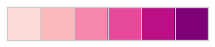

<Figure size 1008x1008 with 0 Axes>

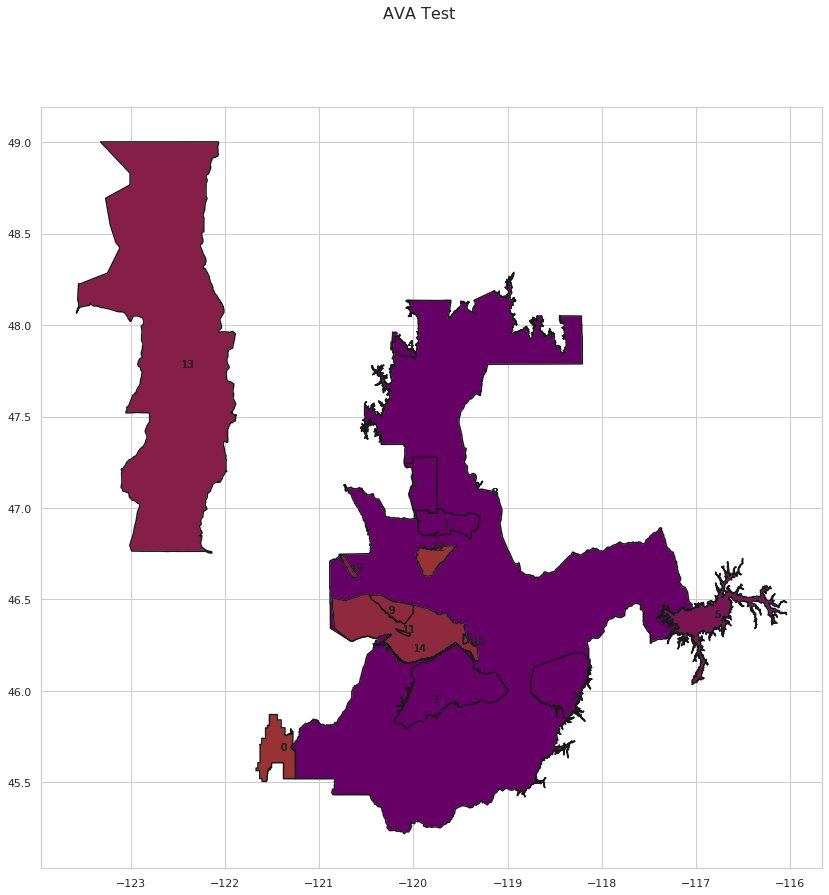

In [21]:
# create an array based on AVA names as listed in dataframe.
name_col = df.loc[:,'Name']
ava_names = name_col.values
print(ava_names)

data = [50, 100, 2000, 300, 1500, 500, 600, 100, 2000, 400, 500, 600, 100, 400, 300, 400]
print_id = True # The shape id will be printed
color_pallete = 5 # 'Purples'
plot_ava_data(sf, 'AVA Test', ava_names, data, color_pallete, print_id)